Intro:

Netflix recently released some user ratings data. We shall deal this dataset by split-apply-combine strategy(https://www.jstatsoft.org/article/view/v040i01) on Netflix movie data. 

What we do?

Split the dataset in to groups, one for each year and then apply a summary statistic, such as mean or median and see if the statistic increases over the years.

Step a - Split the dataset into groups by creating a groupby object from original dataframe.

step b - apply a aggregation fucntion to compute a summary statistic.

step c - combine the resultset into a new Dataframe.

What we use?

Groupby, split-apply-combine and pandas, natplotlib, seaborn.

What we uncover?

Let's see if Netflix subscribers prefer older or newer movies?

Importing the necessary packages and the data and print the first 5 rows.

In [ ]:
#import req packages and set visualization style:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#import data and print first 5 rows:
file = 'Downloads/netflix.csv'
df = pd.read_csv(file)
df.head()

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


summarising the data with plots and statistics. We have NaN value, in the
first row of the 6th column(user_rating_score), it has only 605 values, 
i.e the rest 395 are null values(by using .info() method).


In [3]:
#check the info of DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratinglevel          941 non-null object
ratingdescription    1000 non-null int64
release_year         1000 non-null int64
user_rating_score    605 non-null float64
user_rating_size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 43.0+ KB


We shall drop rows that have missing values, we also drop duplicate values(if any) and build a pair plot on the dataframe using seaborn. We use, 'rating' column to color the data.

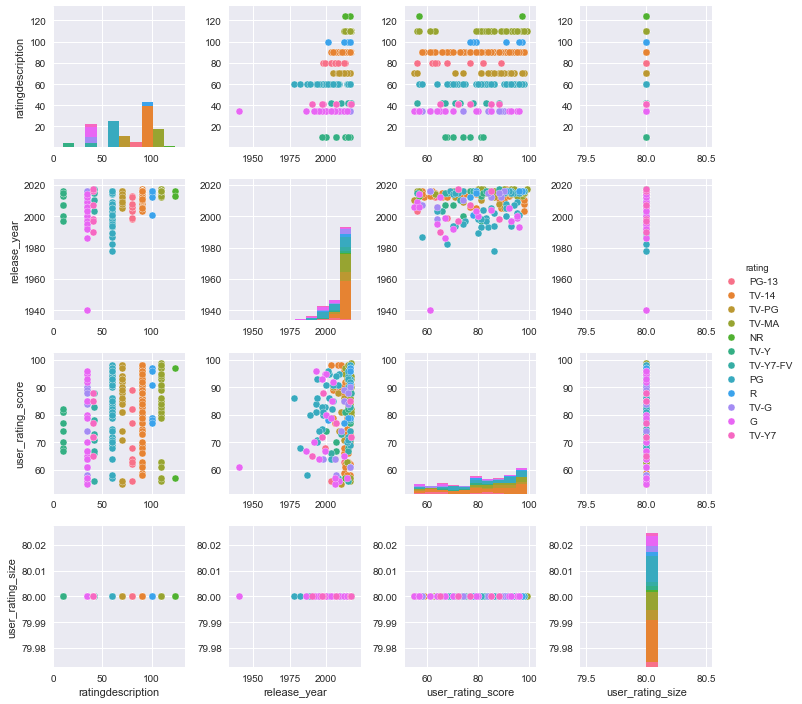

In [10]:
#Drop rows with missing values and drop duplicates:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

#visualize pairplot of df:
sns.pairplot(df, hue='rating')

#plot the graph:
plt.show()

TO check several summary stats for a dataframe, use .describe() method.

In [11]:
#summary stats of DataFrame:
df.describe()

,ratingdescription,release_year,user_rating_score,user_rating_size
count,246.000000,246.000000,246.000000,246.0
mean,73.556911,2010.272358,81.390244,80.0
std,26.616145,8.887219,12.677883,0.0
min,10.000000,1940.000000,55.000000,80.0
25%,60.000000,2007.000000,71.000000,80.0
50%,80.000000,2015.000000,83.500000,80.0
75%,90.000000,2016.000000,92.750000,80.0
max,124.000000,2017.000000,99.000000,80.0


Step a: Split

we will use groupby method to split data into groups, where each group is set of movies in a given year. 

In [28]:
#group by year:
df_by_year = df.groupby('release_year')

This creates a group by object.

In [13]:
#check the type of groupby object:
type(df_by_year)

pandas.core.groupby.DataFrameGroupBy

Step b: Apply

.descibe() method on a dataframe returns a summary statistics for numeric cols, 
likewise, .describe() on dataframegroupby object returns a summary stats of numeric cols, but for each split. 

In [29]:
#summary stats over years:
df_by_year.describe().head()

ratingdescription                                          \
                         count  mean std   min   25%   50%   75%   max   
release_year                                                             
1940                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1978                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1982                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1986                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1987                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   

             user_rating_score        ...              user_rating_size        \
                         count  mean  ...    75%   max            count  mean   
release_year                          ...                                       
1940                       1.0  61.0  ...   61.0  61.0              1.0  80.0   
1978                       1.0  86.0  ...   86.0  86.0              1.0  80.0   
1982                       1.0  68.0  ...   68.0  68.0              1.0  80.0   
1986                       1.0  67.0  ...   67.0  67.0              1.0  80.0   
1987                       1.0  58.0  ...   58.0  58.0              1.0  80.0   

                                                
             std   min   25%   50%   75%   max  
release_year                                    
1940         NaN  80.0  80.0  80.0  80.0  80.0  
1978         NaN  80.0  80.0  80.0  80.0  80.0  
1982         NaN  80.0  80.0  80.0  80.0  80.0  
1986         NaN  80.0  80.0  80.0  80.0  80.0  
1987         NaN  80.0  80.0  80.0  80.0  80.0  

[5 rows x 24 columns]

pass the groupby object to list()

In [19]:
#cast grouping as a list and check out one year
list(df_by_year)[10]

(1995,             title rating                                ratinglevel  \
 766         Balto      G  General Audiences. Suitable for all ages.   
 967  Heavyweights     PG              some rude language and pranks   
 
      ratingdescription  release_year  user_rating_score  user_rating_size  
 766                 35          1995               64.0                80  
 967                 60          1995               74.0                80  )

Step c: combine

We need the mean or median user_rating_score for each year. we can apply, .mean() or .median() to the groupby object and combine into a new dataframe.

In [20]:
#get median values by year and print first 5 rows:
df_med_by_year = df_by_year.median()
df_med_by_year.head()

,ratingdescription,user_rating_score,user_rating_size
release_year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


to obtain the index of the dataframe (df_med_by_year) by using .index on it. It only consists of row lables.

In [23]:
#print the index of DataFrame:
print(df.index)

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            908, 911, 917, 931, 962, 966, 967, 972, 973, 979],
           dtype='int64', length=246)


This index consists of original row no's labeles as integers. '1' is missing as some rows are dropped above. The index of df_med_by_year consists of the values in the original column that you grouped by, the years from release_year

we wanted to look at user_rating_score column, which contains the median rating for each year.

Slice out the (user_rating_score) column out of (df_med_by_year) and plot it as a function of the year (given by the index of the DataFrame df_rat_by_year):

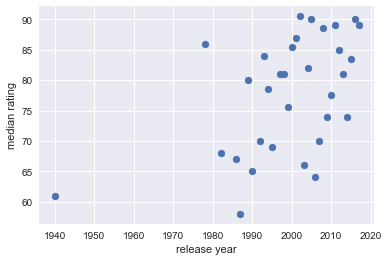

In [32]:
#slice out user rating and plot it:
df_rat_by_year = df_med_by_year['user_rating_score']
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('release year')
plt.ylabel('median rating')
plt.show()

Conclusion:
    
By looking at the graph, we infer that the median rating is increasing over time.